In [2]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
scores=pd.read_csv("C:\\Users\\AYUSH\\Downloads\\student_marks.csv" )
scores.head()

,Unnamed: 0,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53



Welcome! What operation do you want to perform?


Choose: basic level / advance level / exit:  basic level



Basic Level Operations:
Options: mean, max, pass or fail status, highest and lowest marks subject wise
Type 'back' to return to main menu


Enter your task:  back



Welcome! What operation do you want to perform?


Choose: basic level / advance level / exit:  advance level



Advance Level Visuals:
Options: bar plot, dist plot, scatter plot, pair plot
Type 'back' to return to main menu


Enter your task:  bar plot
Enter the subject:  Physics


C:\Users\AYUSH\AppData\Local\Temp\ipykernel_17128\1642490079.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unnamed: 0', y=sub, data=scores, palette='rocket')


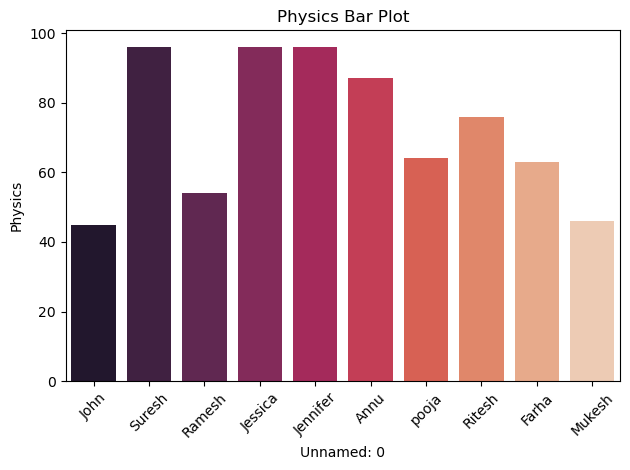


Advance Level Visuals:
Options: bar plot, dist plot, scatter plot, pair plot
Type 'back' to return to main menu


Enter your task:  back



Welcome! What operation do you want to perform?


Choose: basic level / advance level / exit:  exit


Exiting the program. Thank you!


In [24]:
while True:
    print("\nWelcome! What operation do you want to perform?")
    header = input("Choose: basic level / advance level / exit: ").strip().lower()

    if header == "exit":
        print("Exiting the program. Thank you!")
        break

    elif header == "basic level":
        while True:
            print("\nBasic Level Operations:")
            print("Options: mean, max, pass or fail status, highest and lowest marks subject wise")
            print("Type 'back' to return to main menu")
            task = input("Enter your task: ").strip().lower()

            if task == "back":
                break

            elif task == "mean":
                a = input("Enter the subject: ").strip()
                try:
                    if a in scores.columns:
                        print(f"Mean marks in {a}: {scores[a].mean()}")
                    else:
                        print("Invalid subject name.")
                except Exception as e:
                    print(f"Error: {e}")

            elif task == "max":
                b = input("Enter the subject: ").strip()
                try:
                    if b in scores.columns:
                        print(f"Highest marks in {b}: {scores[b].max()}")
                    else:
                        print("Invalid subject name.")
                except Exception as e:
                    print(f"Error: {e}")

            elif task == "pass or fail status":
                a = input("Enter the subject: ").strip()
                if a in scores.columns:
                    passing_marks = scores[a].mean()
                    name = input("Enter the student's name: ").strip()
                    try:
                        student_marks = scores.loc[scores['Unnamed: 0'] == name, a].values[0]
                        print("Pass" if student_marks >= passing_marks else "Fail")
                    except IndexError:
                        print("Student not found.")
                    except Exception as e:
                        print(f"Error: {e}")
                else:
                    print("Invalid subject name.")

            elif task == "highest and lowest marks subject wise":
                sub = input("Enter the subject: ").strip()
                try:
                    if sub in scores.columns:
                        print(f"Highest marks: {scores[sub].max()}")
                        print(f"Lowest marks: {scores[sub].min()}")
                    else:
                        print("Invalid subject name.")
                except Exception as e:
                    print(f"Error: {e}")

            else:
                print("Invalid operation. Please try again.")

    elif header == "advance level":
        while True:
            print("\nAdvance Level Visuals:")
            print("Options: bar plot, dist plot, scatter plot, pair plot")
            print("Type 'back' to return to main menu")
            task = input("Enter your task: ").strip().lower()

            if task == "back":
                break

            elif task == "bar plot":
                sub = input("Enter the subject: ").strip()
                if sub in scores.columns:
                    try:
                        sns.barplot(x='Unnamed: 0', y=sub, data=scores, palette='rocket')
                        plt.title(f"{sub} Bar Plot")
                        plt.xticks(rotation=45)
                        plt.tight_layout()
                        plt.show()
                    except Exception as e:
                        print(f"Error: {e}")
                else:
                    print("Invalid subject name.")

            elif task == "dist plot":
                sub = input("Enter the subject: ").strip()
                if sub in scores.columns:
                    try:
                        sns.histplot(scores[sub], bins=10, kde=True, color='red')
                        plt.title(f"{sub} Distribution")
                        plt.show()
                    except Exception as e:
                        print(f"Error: {e}")
                else:
                    print("Invalid subject name.")

            elif task == "scatter plot":
                print("Choose: on gender basis / performance tier")
                subtask = input("Enter your choice: ").strip().lower()

                if subtask == "on gender basis":
                    sub1 = input("Enter subject 1: ").strip()
                    sub2 = input("Enter subject 2: ").strip()
                    if sub1 in scores.columns and sub2 in scores.columns:
                        try:
                            sns.scatterplot(data=scores, x=sub1, y=sub2, hue="Gender")
                            plt.title(f"{sub1} vs {sub2} (by Gender)")
                            plt.show()
                        except Exception as e:
                            print(f"Error: {e}")
                    else:
                        print("Invalid subject names.")

                elif subtask == "performance tier":
                    try:
                        scores['Performance'] = scores[['Maths', 'Physics', 'Chemistry']].mean(axis=1).apply(
                            lambda x: 'High' if x >= 80 else ('Medium' if x >= 50 else 'Low'))
                        sns.scatterplot(data=scores, x='Physics', y='Chemistry', hue='Performance')
                        plt.title("Performance Levels")
                        plt.show()
                    except Exception as e:
                        print(f"Error: {e}")
                else:
                    print("Invalid scatter plot category.")

            elif task == "pair plot":
                print("Options: gender / skip")
                subtask = input("Enter your choice: ").strip().lower()
                try:
                    if subtask == "gender":
                        sns.pairplot(scores, hue="Gender", palette="rocket")
                        plt.show()
                    else:
                        sns.pairplot(scores)
                        plt.show()
                except Exception as e:
                    print(f"Error: {e}")

            else:
                print("Invalid visualization. Try again.")

    else:
        print("Invalid input. Please type basic level, advance level, or exit.")
